决策树（Decision Tree）是一种非参数的有监督学习方法，它能够从一系列有特征和标签的数据中总结出决策规则，并用树状图的结构来呈现这些规则，以解决分类和回归问题。决策树算法容易理解，适用各种数据，在解决各种问题时都有良好表现，尤其是以树模型为核心的各种集成算法，在各个行业和领域都有广泛的应用。

决策树算法的核心是要解决两个问题：<br/>
1.如何从数据表中找出最佳节点和最佳分枝？<br/>
2.如何让决策树停止生长，防止过拟合？<br/>
几乎所有决策树有关的模型调整方法，都围绕这两个问题展开。<br/>
[决策树原理](https://www.cnblogs.com/bind/p/12102750.html)<br/>

模块sklearn.tree
sklearn中决策树的类都在”tree“这个模块之下。这个模块总共包含五个类：
| 调用                        | 树                                    |
| --------------------------- | ------------------------------------- |
| tree.DecisionTreeClassifier | 分类树                                |
| tree.DecisionTreeRegressor  | 回归树                                |
| tree.export_graphviz        | 将生成的决策树导出为DOT格式，画图专用 |
| tree.ExtraTreeClassifier    | 高随机版本的分类树                    |
| tree.ExtraTreeRegressor     | 高随机版本的回归树                    |

sklearn的基本建模流程<br>
![image-20210807200050239](https://cdn.jsdelivr.net/gh/zEpoch/imageHome/img/image-20210807200050239.png)
<br>
在这个流程下，分类树对应的代码是：
<br>


```python
from sklearn import tree #导入需要的模块
clf = tree.DecisionTreeClassifier()     #实例化
clf = clf.fit(X_train,y_train) #用训练集数据训练模型
result = clf.score(X_test,y_test) #导入测试集，从接口中调用需要的信息
```



In [22]:
# 步骤1 导入需要的算法库和模块
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [23]:
# 步骤2 导入数据
wine = load_wine()
print("wine.data.shape:\n",wine.data.shape)
#如果wine是一张表，应该长这样：
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
print("wine.feature_names:\n",wine.feature_names)
print("wine.feature_names:\n",wine.target_names)

wine.data.shape:
 (178, 13)
wine.feature_names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
wine.feature_names:
 ['class_0' 'class_1' 'class_2']


In [24]:
# 步骤3 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target,test_size=0.3)
print(Xtrain.shape,Xtest.shape)

(124, 13) (54, 13)


In [25]:
# 步骤4 建立模型
clf = tree.DecisionTreeClassifier(
    criterion="entropy"
)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest, Ytest)
print(score)

1.0


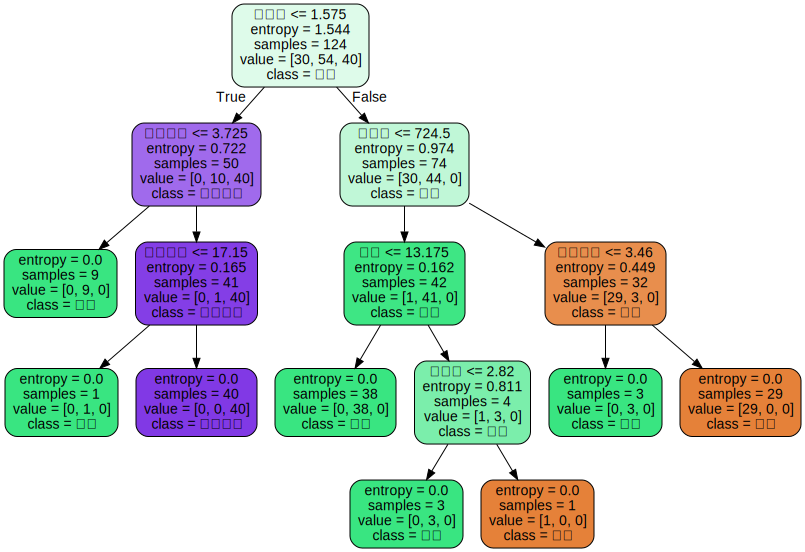

In [26]:
# 步骤5 画出一棵树
feature_names = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(
    clf
    ,feature_names=feature_names
    ,class_names=["琴酒","雪梨","贝尔摩特"] # 分为三类，三类的名字
    ,filled=True
    ,rounded=True # 圆角
)
graph = graphviz.Source(dot_data)
graph

In [27]:
# 特征的重要性
clf.feature_importances_
[*zip(feature_names,clf.feature_importances_)]

[('酒精', 0.018658479191242153),
 ('苹果酸', 0.016948184280947114),
 ('灰', 0.0),
 ('灰的碱性', 0.035422871232545804),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.4350405309326196),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.22811392090116003),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.2658160134614852)]

在只了解一个参数的情况下，建立了一棵完整的决策树。但是回到建立模型的步骤，score会在某个值附近波动，引起步骤5中画出来的每一棵树都不一样。它为什么会不稳定呢？如果使用其他数据集，它还会不稳定吗？<br>
无论决策树模型如何进化，在分枝上的本质都还是追求某个不纯度相关的指标的优化，不纯度是基于节点来计算的，也就是说，决策树在建树时，是靠优化节点来追求一棵优化的树，但最优的节点却不能够保证最优的树。集成算法被用来解决这个问题：<br>
sklearn表示，既然一棵树不能保证最优，那就建更多的不同的树，然后从中取最好的。怎样从一组数据集中建不同的树？在每次分枝时，不从使用全部特征，而是随机选取一部分特征，从中选取不纯度相关指标最优的作为分枝用的节点。这样，每次生成的树也就不同了。

In [28]:
clf = tree.DecisionTreeClassifier(
    criterion="entropy"
    ,random_state=30
)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9629629629629629

random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据（比如鸢尾花数据集），随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。<br>
splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能性。当然，树一旦建成，我们依然是使用剪枝参数来防止过拟合。

In [ ]:
clf = tree.DecisionTreeClassifier(
    criterion="entropy"
    ,random_state=30
    ,splitter="random"
)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print("score:\n",score)
import graphviz
dot_data = tree.export_graphviz(
    clf
    ,feature_names= feature_names
    ,class_names=["琴酒","雪莉","贝尔摩德"]
    ,filled=True
    ,rounded=True
)  
graph = graphviz.Source(dot_data)
graph

在不加限制的情况下，一棵决策树会生长到衡量不纯度的指标最优，或者没有更多的特征可用为止。这样的决策树往往会过拟合，这就是说，它会在训练集上表现很好，在测试集上却表现糟糕。我们收集的样本数据不可能和整体的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，它找出的规则必然包含了训练样本中的噪声，并使它对未知数据的拟合程度不足。